In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")


In [4]:
bathrooms = pd.read_csv('bathrooms.csv')
bedrooms = pd.read_csv('bedrooms.csv')
garage_spaces = pd.read_csv('garage_spaces.csv')
garage = pd.read_csv('garage.csv')
school_ratings = pd.read_csv('school_ratings.csv')
sqzip = pd.read_csv('sqzip.csv')
year_built = pd.read_csv('year_built.csv')

In [5]:
def plot_and_correlate(df, x_col, y_col, title):
    print(f"\n=== {title} ===")
    
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()
    
    corr_df = df[[x_col, y_col]].corr()
    print(corr_df)
    print(df.info())
    
    return corr_df.loc[x_col, y_col]

In [6]:
correlations = {}


=== Bathrooms vs Price ===


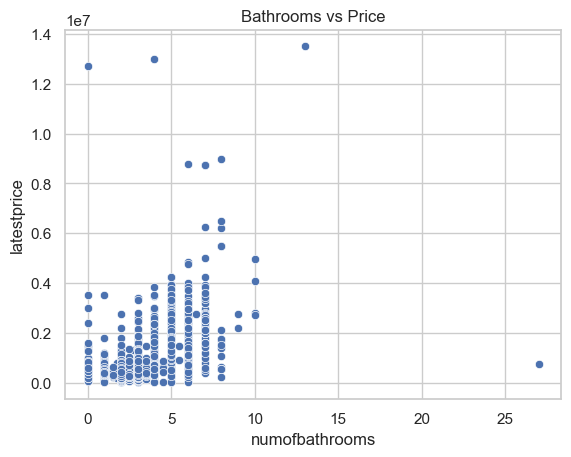

                numofbathrooms  latestprice
numofbathrooms        1.000000     0.504738
latestprice           0.504738     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   numofbathrooms  15171 non-null  float64
 1   latestprice     15171 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 237.2 KB
None


In [7]:
correlations['numofbathrooms'] = plot_and_correlate(bathrooms, 'numofbathrooms', 'latestprice', 'Bathrooms vs Price')


=== Bedrooms vs Price ===


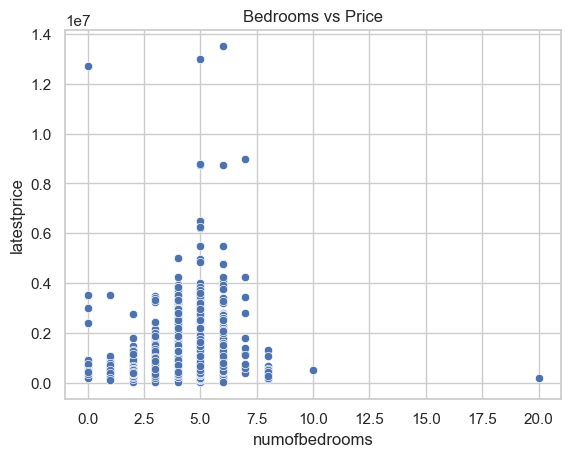

               numofbedrooms  latestprice
numofbedrooms       1.000000     0.299839
latestprice         0.299839     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   numofbedrooms  15171 non-null  int64
 1   latestprice    15171 non-null  int64
dtypes: int64(2)
memory usage: 237.2 KB
None


In [8]:
correlations['numofbedrooms'] = plot_and_correlate(bedrooms, 'numofbedrooms', 'latestprice', 'Bedrooms vs Price')


=== Garage Spaces vs Price ===


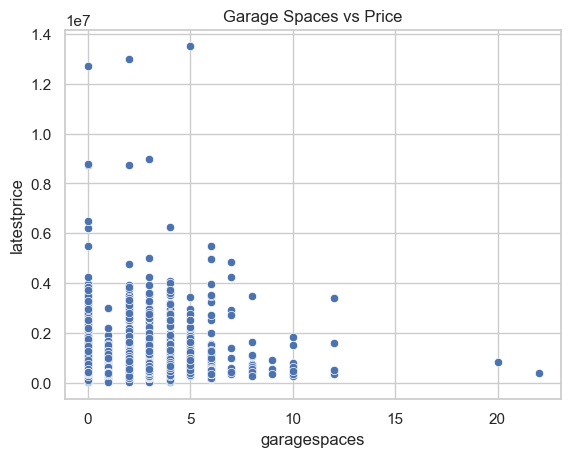

              garagespaces  latestprice
garagespaces      1.000000     0.157443
latestprice       0.157443     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   garagespaces  15171 non-null  int64
 1   latestprice   15171 non-null  int64
dtypes: int64(2)
memory usage: 237.2 KB
None


In [9]:
correlations['garagespaces'] = plot_and_correlate(garage_spaces, 'garagespaces', 'latestprice', 'Garage Spaces vs Price')


=== Garage (0=No, 1=Yes) vs Price ===


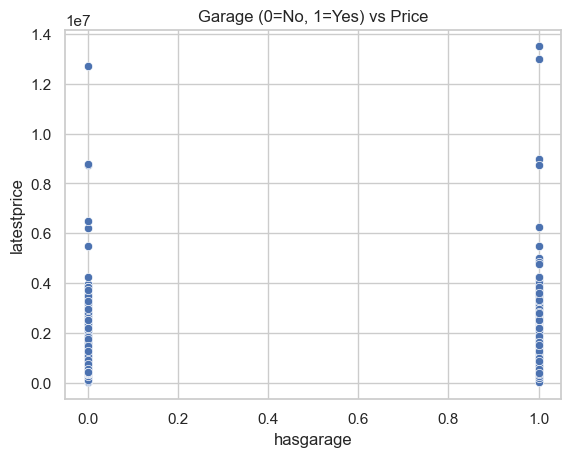

             hasgarage  latestprice
hasgarage     1.000000     0.074161
latestprice   0.074161     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   hasgarage    15171 non-null  int64
 1   latestprice  15171 non-null  int64
dtypes: int64(2)
memory usage: 237.2 KB
None


In [10]:
garage['hasgarage'] = garage['hasgarage'].astype(int)
correlations['hasgarage'] = plot_and_correlate(garage, 'hasgarage', 'latestprice', 'Garage (0=No, 1=Yes) vs Price')


=== School Rating vs Price ===


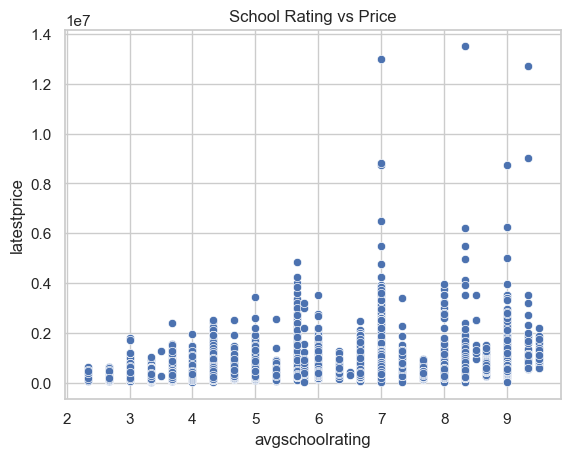

                 avgschoolrating  latestprice
avgschoolrating         1.000000     0.293101
latestprice             0.293101     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   avgschoolrating  15171 non-null  float64
 1   latestprice      15171 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 237.2 KB
None


In [11]:
correlations['avgschoolrating'] = plot_and_correlate(school_ratings, 'avgschoolrating', 'latestprice', 'School Rating vs Price')


=== Year Built vs Price ===


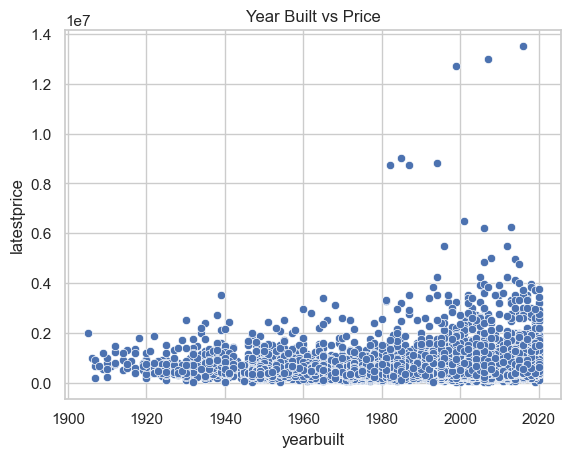

             yearbuilt  latestprice
yearbuilt     1.000000     0.059692
latestprice   0.059692     1.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   yearbuilt    15171 non-null  int64
 1   latestprice  15171 non-null  int64
dtypes: int64(2)
memory usage: 237.2 KB
None


In [12]:
correlations['yearbuilt'] = plot_and_correlate(year_built, 'yearbuilt', 'latestprice', 'Year Built vs Price')


=== Zipcode vs Price per Square Foot (Boxplot) ===


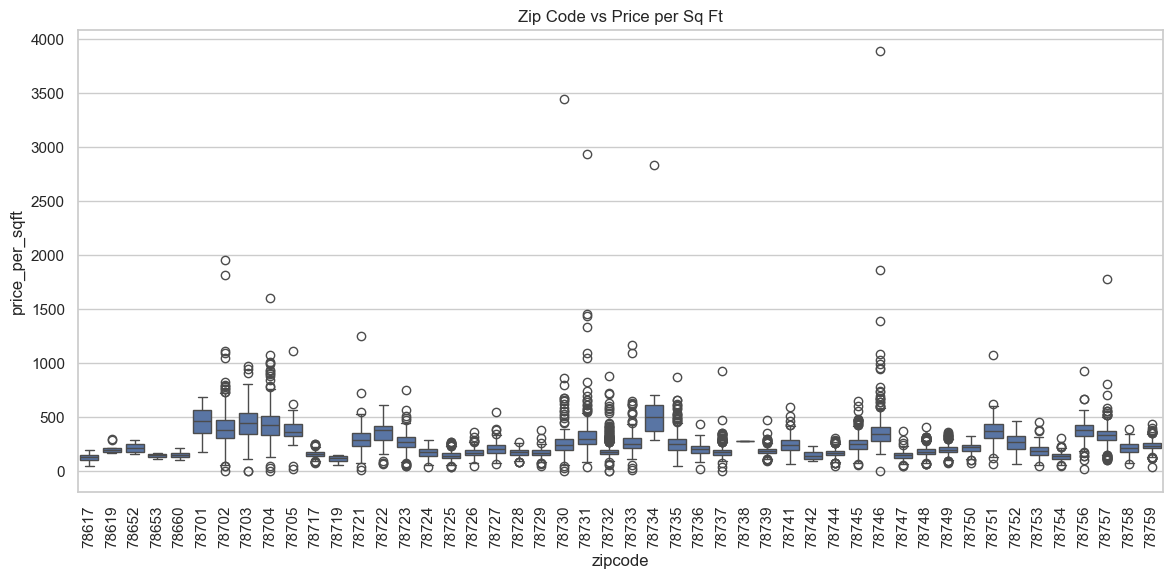

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   zipcode         15171 non-null  int64
 1   price_per_sqft  15171 non-null  int64
dtypes: int64(2)
memory usage: 237.2 KB
None

Correlation between Zip Code and Price per Sq Ft: -0.22


In [13]:
print("\n=== Zipcode vs Price per Square Foot (Boxplot) ===")
plt.figure(figsize=(14, 6))
sns.boxplot(data=sqzip, x='zipcode', y='price_per_sqft')
plt.title('Zip Code vs Price per Sq Ft')
plt.xticks(rotation=90)
plt.show()
print(sqzip.info())

if pd.api.types.is_numeric_dtype(sqzip['zipcode']):
    zip_corr = sqzip[['zipcode', 'price_per_sqft']].corr().loc['zipcode', 'price_per_sqft']
    print(f"\nCorrelation between Zip Code and Price per Sq Ft: {zip_corr:.2f}")
    correlations['zipcode'] = zip_corr